In [7]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import datetime
from itertools import islice
from shapely.geometry import Point, Polygon

In [8]:
matplotlib.rcParams['figure.figsize'] = (12.0, 8.0)
matplotlib.style.use('ggplot')

In [9]:
def parse_timestamp(el):
    b = datetime.datetime.strptime(el, fmt)
    return b

In [10]:
fmt = '%Y-%m-%d %H:%M:%S'

In [11]:
url = "./final_data_agg3_2021-07.csv"
df = pd.read_csv(url, sep=';', low_memory=False)

In [12]:
df

,lat,lng,location_id,ride_id,cluster_kmns,cluster,centroid_lat,centroid_lng,ride_count
0,50.906013,6.942883,21206.0,0.0,19,9,50.906529,6.939677,2219
1,50.921516,6.958568,52201.0,1.0,12,26,50.920353,6.956457,3309
2,50.907453,6.928838,1474.0,2.0,16,12,50.916073,6.927038,3459
3,50.917138,6.906824,53103.0,3.0,2,23,50.920433,6.903904,1138
4,50.918902,6.909860,30430.0,4.0,2,23,50.920433,6.903904,1138
...,...,...,...,...,...,...,...,...,...
157499,50.937760,6.886216,56665.0,143067.0,14,18,50.940381,6.887589,1532
157500,50.921933,6.923710,66289.0,143074.0,36,12,50.916073,6.927038,3459
157501,50.959804,6.901312,19780.0,143081.0,5,50,50.955853,6.903453,2550
157502,50.924960,6.937767,67188.0,143083.0,23,16,50.928633,6.938887,7723


In [13]:
points = df.loc[:,["lat", "lng"]]
X_points = np.array(points)
X_points

array([[50.906013,  6.942883],
       [50.921516,  6.958568],
       [50.907453,  6.928838],
       ...,
       [50.959804,  6.901312],
       [50.92496 ,  6.937767],
       [50.93864 ,  6.937268]])

In [14]:
import geopandas as gpd

In [15]:
cologne_sf = "./cologne/edges.shp"
cologne = gpd.read_file(cologne_sf)

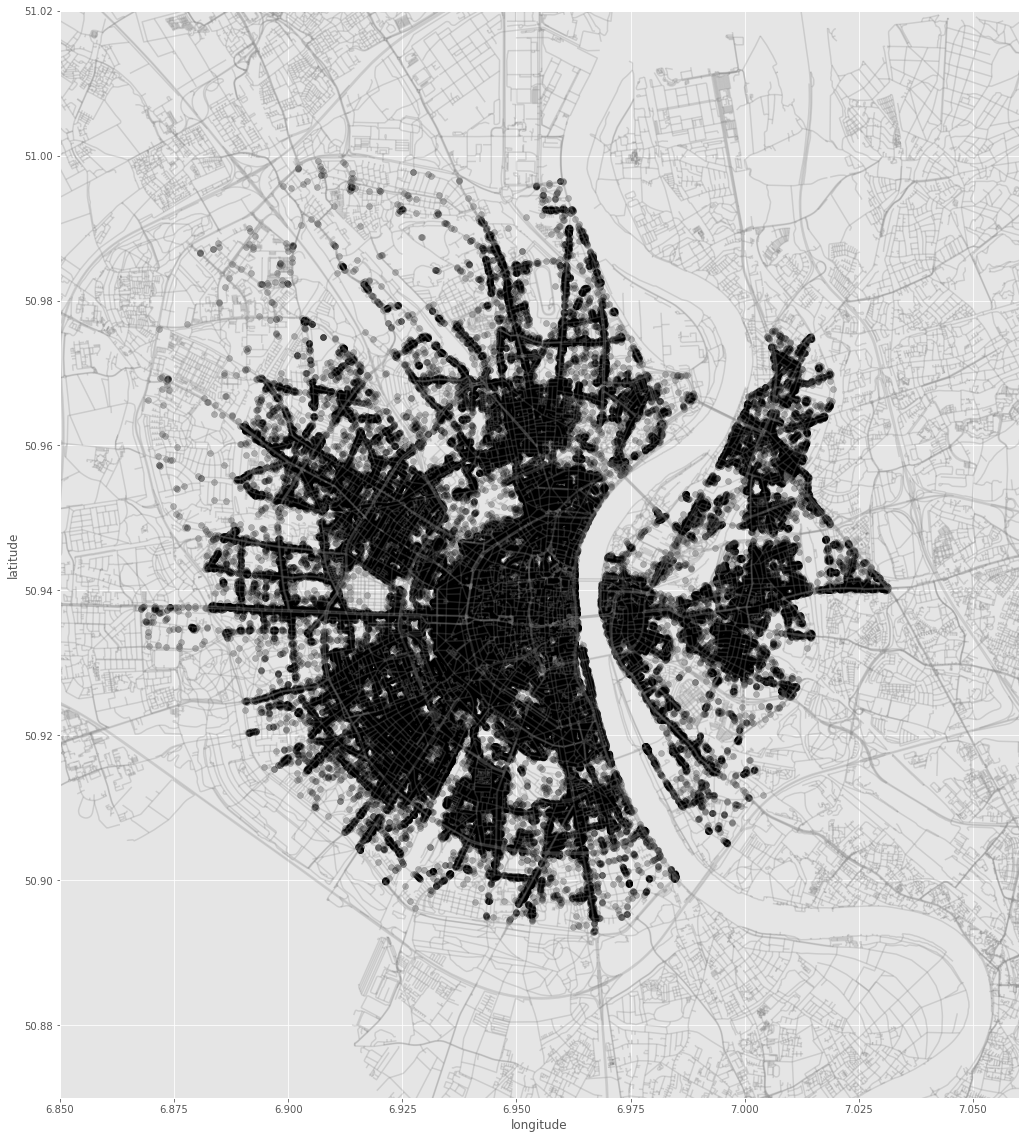

In [16]:
f, ax = plt.subplots(1, figsize=(30,20))
cologne.plot(ax=ax, color="grey", alpha = 0.25)
plt.xlim(6.85, 7.06)
plt.ylim(50.87, 51.02)
plt.scatter(X_points[:, 1], X_points[:, 0], c="black", alpha=0.25)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

In [17]:
points_cluster = df.loc[:,["centroid_lat", "centroid_lng"]]
points_cluster = np.array(points_cluster)
size = df.loc[:,"ride_count"]

In [18]:
points_cluster

array([[50.90652938,  6.93967704],
       [50.92035258,  6.95645704],
       [50.91607314,  6.92703765],
       ...,
       [50.95585286,  6.90345253],
       [50.92863268,  6.93888744],
       [50.93529137,  6.93388972]])

In [19]:
import json
 
# Opening JSON file
f = open('hospitals.json')
 
# returns JSON object as
# a dictionary
data_h = json.load(f)
 
f.close()

In [20]:
data = data_h['features']

In [21]:
df_hospitals = pd.DataFrame()
names=[]
latitudes = []
longitudes = []
for hospital in data:
    names.append(hospital['attributes']['name'])
    longitudes.append(hospital['geometry']['x'])
    latitudes.append(hospital['geometry']['y'])
df_hospitals['name'] = names
df_hospitals['lng'] = longitudes
df_hospitals['lat'] = latitudes 

In [22]:
crs={'init':'epsg:4326'}
geometry=[Point(xy) for xy in zip(df_hospitals["lng"], df_hospitals["lat"])]
geodata=gpd.GeoDataFrame(df_hospitals,crs=crs, geometry=geometry)

C:\Users\nadja\anaconda3\envs\geodata\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [23]:
df_hospitals

,name,lng,lat,geometry
0,Eduardus-Krankenhaus,6.980327,50.932766,POINT (6.98033 50.93277)
1,Ev. Krankenhaus Weyertal,6.925405,50.927391,POINT (6.92540 50.92739)
2,MediaPark Klinik,6.947520,50.948564,POINT (6.94752 50.94856)
3,Klinik am Ring,6.941231,50.931139,POINT (6.94123 50.93114)
4,UniversitÃ¤tskliniken,6.918107,50.924340,POINT (6.91811 50.92434)
5,PAN Klinik am Neumarkt,6.948554,50.937001,POINT (6.94855 50.93700)
6,St. Antonius Krankenhaus,6.966392,50.910580,POINT (6.96639 50.91058)
7,St.Hildegardis Krankenhaus,6.923612,50.931233,POINT (6.92361 50.93123)
8,St. Vinzenz-Hospital,6.946862,50.966845,POINT (6.94686 50.96684)
9,St. Agatha Krankenhaus,6.960174,50.987344,POINT (6.96017 50.98734)


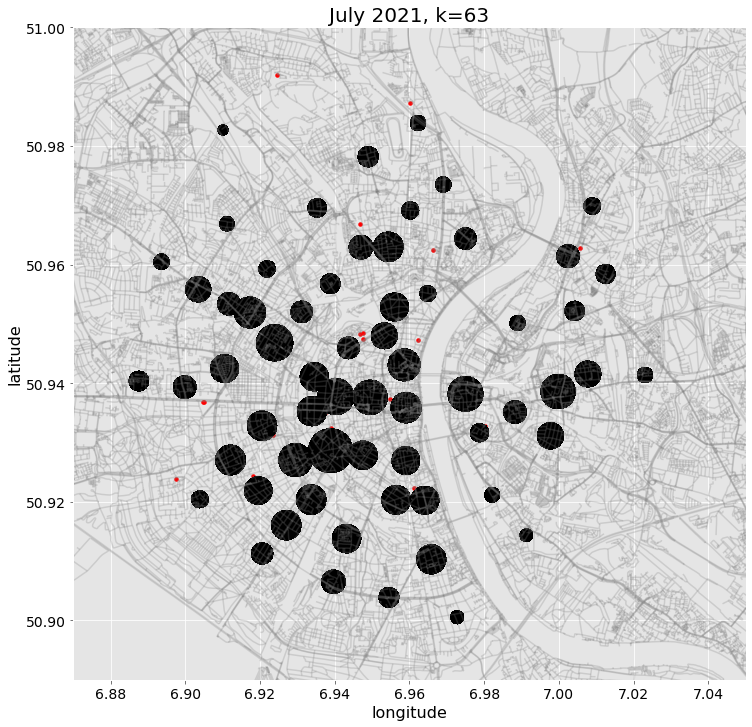

In [25]:
f, ax = plt.subplots(1, figsize=(22,12))
cologne.plot(ax=ax, color="grey", alpha = 0.25)
geodata.plot(ax=ax, color='red', markersize=15);
plt.xlim(6.87, 7.05)
plt.ylim(50.89, 51.00)
plt.scatter(points_cluster[:, 1], points_cluster[:, 0], s=size*0.25, c="black", alpha=0.8)
plt.xticks(fontsize=14, color='#000000')
plt.yticks(fontsize=14, color='#000000')
plt.xlabel('longitude', fontsize=16, color='#000000')
plt.ylabel('latitude', fontsize=16, color='#000000')
plt.title('July 2021, k=63', fontsize=20, color='#000000')
plt.show()
#f.savefig("../july21k63.png", transparent=True)